In [3]:
#importing the libraries that will be used 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
np.random.seed(0)#this gets us the same set of random number after every call

In [5]:
#for finding the gaussian PMF
def getDist(x,mu,sigma):
    return np.exp((-(np.square(x-mu)))/(2*np.square(sigma)))/(np.sqrt(2*np.pi*np.square(sigma)))

In [6]:
mu_d = 10
sigma_d = 5
data = np.random.normal(mu_d,sigma_d,50) #given data in the problem

In [7]:
mu_prior = 25
sigma_prior = 5
prior = np.random.normal(mu_prior,sigma_prior,50) #given prior

$\textbf{Derivation of likelihood from the given data}$<br>Assuming the data is Independtly and identically distributted in normal distribution so the total likelihood will be give by the product of all likelihoods<br>
\begin{align*}
Final &= \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{\frac{-1}{2 \sigma^{2}}{(y_i - \mu)}^{2}} \\
&= ({\frac{1}{\sqrt{2 \pi \sigma^{2}}}})^{n} e^{\frac{-1}{2 \sigma^{2}}{(\sum_{i=1}^{n}(y_i - \mu)}^{2}  }\\
&= {\frac{-1}{2 \sigma^{2}}({\sum_{i=1}^{n}(y_i^{2} + \mu^{2} - 2 y_i \mu)}}) \text{ignoring the exponent e and the root term}\\
&= \frac{-1}{2 \sigma^{2}}({\sum_{i=1}^{n}y_i^{2} + n \mu^{2} - 2\mu n \overline{y}}) \\
&= \frac{-n}{2 \sigma^{2}}({\mu^{2} - 2\mu \overline{y} +  \frac{\sum_{i=1}^{n}y_i^{2}}{n}})\tag{1}\\
\end{align*}
 since the likelihood should be a normal likelihood so the form should be like this 
 \begin{align*}
 &= exp{\frac{-1}{2 \sigma_l^{2}} ({\mu - \mu_l}^{2})}\\
 \end{align*} ignoring the constants and expanding the square we will get 
 \begin{align*}
 &=exp\{\frac{-1}{2\sigma_l^{2}} (\mu^{2}-2\mu\mu_l + \mu_l^{2}) \}\tag{2}
 \end{align*}
 
 after we compare the equations (1) and (2) we get 
 \begin{align*}
 \mu_l &= \overline{y} \space \text{and}\space \frac{-n}{2\sigma^{2}} = \frac{-1}{2\sigma_l^{2}} \space\text{which is}\space  \sigma_l^{2} = \frac{\sigma_{data}^{2}}{n}
 \end{align*}

In [8]:
mu_like = 10
sigma_like = sigma_d/np.sqrt(len(data))

$\textbf{Posterior calculation}$<br>
The product of two gaussian random  variables is not a gaussian random variable but the product of two gaussian distributions is proportional to a gaussian distribution. In our case we have both the prrior and the likelihood normal so our posterior will also be a normal.<br>
Above we found out that the likelihood of n iid samples from normal distribution $N(\mu,\sigma)$ is distributed normally as $N(\overline{y},\frac{\sigma}{\sqrt{n}})$ where $\overline{y}$ is the mean of the samples drawn. Lets consider the prior to be $N(m,s)$ where m is the mean and s is the standard deviation so prior * likelihood will be $N(\mu_{pos},\sigma_{pos})$ Now the PDF of normal distribution is given as $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{-({x-\mu})^{2}   }{2\sigma^{2}    }}\tag{1}$<br>
\begin{align*}
\text{posterior} &\propto \text{prior} * \text{likelihood}\\
g(\mu|y_1,y2,,,,y_n) &\propto g(d) * f(y_1,y_2,,,,,|d)\space\text{d is the given data}\\
&\propto \frac{1}{\sigma_p \sqrt{2\pi}}exp({\frac{-1}{2s^{2}}}(\mu-m)^2)) * \frac{1}{\sigma_l \sqrt{2\pi}}exp({\frac{-1}{2\sigma_{l}^{2}}}(\mu-\overline{y})^2)\\
\\
&\propto exp({\frac{-1}{2s^{2}}}(\mu-m)^2)) * exp({\frac{-n}{2\sigma_{l}^{2}}}(\mu-\overline{y})^2)\space \text{ignoring the constants}\\
&\propto exp(\frac{1}{2s^{2}} (\mu-m)^{2} - \frac{n}{2\sigma_l^{2}} (\mu-\overline{y})^{2})\space\text{using the property of exponents}\\
&\propto exp(\frac{1}{2s^{2}} (\mu^2+m^2-2\mu m) - \frac{n}{2\sigma_l^{2}} (\mu^2+(\overline{y})^{2} - 2\mu \overline{y}))\\
& \propto exp(\frac{-1}{2}[\mu^2(\frac{1}{s^2} + \frac{n}{\sigma_l^{2}}) -2\mu (\frac{m}{s^2} + \frac{n \overline{y}}{\sigma_{l}^2}) + \frac{m^2}{s^2} + \frac{(\overline{y})^2}{\sigma_l^{2}}])\tag{2}\\
&= exp(\frac{-1}{2\sigma_{n}^{2}}[\mu^2 + \mu_n^{2}-2\mu\mu_n])\space\text{ignoring the constants and expanding the exponent from equation 1}\\
\frac{-1}{2\sigma_{n}^{2}}* \mu^{2} &= \frac{\mu^{2}}{2}(\frac{1}{s^2} + \frac{n}{\sigma_l^{2}})\\
\frac{1}{\sigma_n^{2}} &= (\frac{1}{s^2} + \frac{n}{\sigma_l^{2}})\space \text{comparing the powers of $\mu^2$}\\
\sigma_n^{2} &= \frac{\sigma_l^{2}s^{2}}{\sigma_l^{2} + s^{2}n}\tag{3}\\
SD &= \sqrt{\frac{\sigma_l^{2}s^{2}}{\sigma_l^{2} + s^{2}n}}\\
\frac{-\mu \mu_n}{\sigma_n^{2}}&= \mu(\frac{m}{s^2} + \frac{n\overline{y}}{\sigma_l^{2}})\space \text{comparing the power of $\mu$}\\
\frac{\mu_n}{\sigma_n^{2}} &= \frac{m\sigma_l^{2}+n\overline{y}s^2}{\sigma_l^2 s^2}\\
\mu_n &= \sigma_n^{2} (\frac{m\sigma_l^{2}+n\overline{y}s^2}{\sigma_l^2 s^2})\\
Mean&=\frac{m\sigma_l^{2}+n\overline{y}s^2}{\sigma_l^2 + ns^2}
\end{align*}


In [9]:
denom = (np.square(sigma_d) + np.square(sigma_prior)*len(data))

In [10]:
var_posterior = (np.square(sigma_d) * np.square(sigma_prior)) / denom
sigma_posterior = np.sqrt(var_posterior)
sigma_posterior

0.7001400420140049

In [11]:
mu_posterior = (mu_prior * np.square(sigma_d) + np.sum(data)*np.square(sigma_prior))/denom
mu_posterior

10.983133687809307

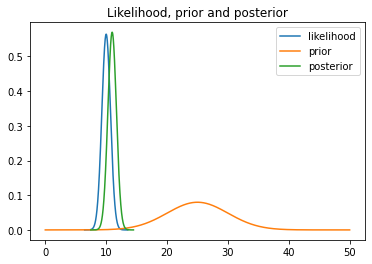

In [12]:
#np.linspace(low,high,size) returns evenly spaced numbers over  specified interval.
x_like = np.linspace(mu_like-5*sigma_like,mu_like+5*sigma_like,1000)

plt.plot(x_like,getDist(x_like,mu_like,sigma_like),label='likelihood') #for every point we will get that point probability
                                                                        #which will help us in plotting as a curve

x_prior = np.linspace(mu_prior-5*sigma_prior,mu_prior+5*sigma_prior,1000)

plt.plot(x_prior,getDist(x_prior,mu_prior,sigma_prior),label='prior')

x_pos = np.linspace(mu_posterior-5*sigma_posterior,mu_posterior+5*sigma_posterior,1000)

plt.plot(x_pos,getDist(x_pos,mu_posterior,sigma_posterior),label='posterior')

plt.title('Likelihood, prior and posterior')

plt.legend()
plt.show()

2.b

The Metropolis algorithm is used for MCMC sampling where we try to approximate the distribution of the model parameters after seeing the data, i.e. $P(\theta|Y)$ following are the steps:
1. At the start of the every iteration we sample a possible theta(say $\theta_t^{*}$) from "jump distribution" which can be considered as Gaussian Distribution.
2. We calculate the posterior value for $\theta_t^{*}$ which is the product of prior and likelihood with that sampled theta $\theta_t^{*}$ and another posterior using using the current $\theta_{t-1}$ that we were working with before.
3. We calcuate a ratio $\frac{f(\theta_t^{*})f_{Y|\theta}(Y|\theta_t^{*})}{f(\theta_{t-1})f_{Y|\theta}(Y|\theta_{t-1})}$ where $f(\theta_t^{*})$ is the prior with the sampled theta,$f_{Y|\theta}(Y|\theta_t^{*})$ is the likelihood with the sampled theta,$f(\theta_{t-1})$ is the prior with the previous theta  and $f_{Y|\theta}(Y|\theta_{t-1})$ is the likelihood with the previous theta. The posterior is calculated as (prior * likelihood)/ marginal and when we divide two posterior the ,marginals gets cancelled that's why there weren't consdidered in the ratio.
4. If the ratio$\frac{f(\theta_t^{*})f_{Y|\theta}(Y|\theta_t^{*})}{f(\theta_{t-1})f_{Y|\theta}(Y|\theta_{t-1})}$ > 1 then we will accept the proposed theta and update our current theta because the posterior for proposed theta will be greater than the posterior of the parameter that we are working with, which will mean that the proposed theta is a better estimate for the data
5. If r is less than 1 then we generate a random number between 0 and 1 and if r is greater than the generated number we accept the r and update the parameters

After many iterations the updated theta will be an approximation of our posterior distribution on theta and the best thing about this technique is that the conjugacy between the likelihood and the prior is not required to calculate the bayesian posterior we only require the closed form solution of likelihood and the prior which is available in this case.

In [13]:
#function takes the parameters theta which consists of mean and standard deviation, which will define how we move from 
#current sigma to new sigma
def proposal_theta(theta):
    return [theta[0],np.random.normal(theta[1],5,(1,))[0]]

In [14]:
#this function takes the arguments and the data to return a normal likelihood
def getLikelihood(theta,data):
    temp = []
    for i in data:
        temp.append(getDist(i,theta[0],theta[1]))
    return np.prod(temp)

In [15]:
#this function will return the probability of getting the proposed value
def getPrior(theta):
    x = theta[0]
    return np.exp((-(np.square(x-mu_prior)))/(2*np.square(sigma_prior)))/(np.sqrt(2*np.pi*np.square(sigma_prior)))

In [16]:
#takes the initial parameters and returns the accepted parameters
def metropolis_hastings(init_params,max_iter,data):
    accepted = [] #  array to store the accepted parameters
    for i in range(max_iter):
       
        
        possible_theta = proposal_theta(init_params)#sample from the jump distribution
#         print(possible_theta)
        prior_for_possible_theta = getPrior(possible_theta)#prior for that sample
        
        likelihood_for_possible_theta = getLikelihood(possible_theta,data)#likelihood for that sample
        
        proposed_posterior = prior_for_possible_theta * likelihood_for_possible_theta#the posterior for that drawn sample
        
        prior_for_current_theta = getPrior(init_params)#prior for that the current theta
        
        likelihood_for_current_theta = getLikelihood(init_params,data)#likelihood for that the current theta
        
        current_posterior =  prior_for_current_theta * likelihood_for_current_theta #posterior for current theta
        
        r = proposed_posterior/current_posterior
        if r > 1:
            init_params = possible_theta #update old theta with proposed theta
            
            accepted.append(init_params)#accept if r > 1
            
        else:
            a = np.random.uniform(0,1)
            if r > a:
                init_params = possible_theta
                accepted.append(init_params)#accept if greater than random number a
    return np.array(accepted,dtype=float)

In [17]:
accepted = metropolis_hastings([mu_posterior,5],20000,data)

In [18]:
#taking the last 80% values because the first 20% values are called burn in meaning the algorithm will take 
#atleast that much data after which the parameters start to change
last=int(-0.80*accepted.shape[0])

In [19]:
estimated_mu = accepted[last:,0].mean()
estimated_sigma = accepted[last:,1].mean()

In [20]:
if estimated_sigma < 0:
    estimated_sigma = -estimated_sigma

In [21]:
estimated_posterior = np.random.normal(estimated_mu,estimated_sigma,100)
analytic_posterior = np.random.normal(mu_posterior,sigma_posterior,100)

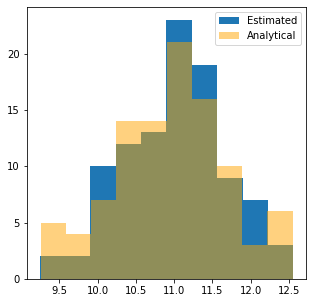

In [22]:
fig = plt.figure(figsize=(5,5))
plt.hist(estimated_posterior,bins=10 ,label="Estimated")
plt.hist(analytic_posterior,bins=10,color = 'orange',label='Analytical',alpha=0.5)
plt.legend()

2c<br>
If your jumping distribution’s standard deviation is too large relative to the true distribution of the parameter, your simulated posterior will have lots of gaps because no proposals were generated in those locations.The strength of your prior belief affects the rate of convergence.For checking the convergence i have modified the above metropolis_hastings code so that it takes the proposal width now as a argumenet too

In [23]:
#same function as transition_model except now we can change the proposal width now
def proposal_checker(theta,w):
    return [theta[0],np.random.normal(theta[1],w,(1,))[0]]

In [24]:
def checker(init_params,max_iter,data,width):
    accepted = [] #  array to store the accepted parameters
    for i in range(max_iter):
       
        
        possible_theta = proposal_checker(init_params,width)#sample from the jump distribution
        prior_for_possible_theta = getPrior(possible_theta)#prior for that sample
        
        likelihood_for_possible_theta = getLikelihood(possible_theta,data)#likelihood for that sample
        
        proposed_posterior = prior_for_possible_theta * likelihood_for_possible_theta#the posterior for that drawn sample
        
        prior_for_current_theta = getPrior(init_params)#prior for that the current theta
        
        likelihood_for_current_theta = getLikelihood(init_params,data)#likelihood for that the current theta
        
        current_posterior =  prior_for_current_theta * likelihood_for_current_theta #posterior for current theta
        
        r = proposed_posterior/current_posterior
        if r > 1:
            init_params = possible_theta #update old theta with proposed theta
            
            accepted.append(init_params)#accept if r > 1
            
        else:
            a = np.random.uniform(0,1)
            if r > a:
                init_params = possible_theta
                accepted.append(init_params)#accept if greater than random number a
#     return np.array(accepted,dtype=float)

In [25]:
#will be using time module to keep track of time
import time
n_iter = 200# number of iiterations the modified metropolis_hastigs will run

In [26]:
#array of proposal_width
width_arr = np.linspace(0,10,100)

In [27]:
#here we record the proposal width and the time required for the algorithm to run for that proposal width
x = []
y = []
for i in width_arr:
    x.append(i)
    start = time.time()
    checker([mu_posterior,5],n_iter,data,i)
    end = time.time()
    y.append(end - start)

Text(0.5, 1.0, 'Proposal width vs time')

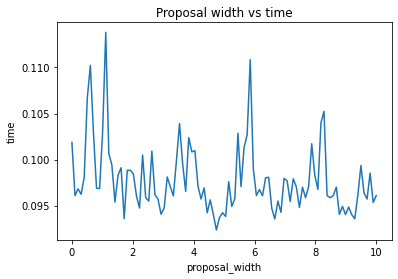

In [28]:
plt.plot(x,y)
plt.xlabel('proposal_width')
plt.ylabel('time')
plt.title('Proposal width vs time')

we can see that we are getting lesser time between 2.5 and 6